# Algorithm for Data Processing

1. Start
2. Read .csv file.
3. Create separate files for each state.
4. Is forecast year=year observed?
5. If yes, go to step 6. If no, go to step 9.
6. n=number of duplicates in Internal Project ID.
If Internal Project ID is unavailable, find duplicates by some other method.
7. New columns for Percentage Error.
8. Percentage Error=1/n*(Forecast-Actual)/Forecast. END
9. years=forecast year- year observed.
10. growth rate= difference between two projections/number of years in between projections.
11. adjusted forecast=forecast AADT X growth rate X years. Go to step 7.

## Step 1: Read Data File

Import necessary packages. 

In [1]:
import pandas as pd #for working with dataframe
import numpy as np
from scipy import stats, integrate #will help in stats operation in histograms
import matplotlib.pyplot as plt #to plot the PE
import seaborn as sns #nice looking plots
%matplotlib inline
sns.set(color_codes=True)

##### Read the CSV file. Look at Data. 

In [3]:
df=pd.read_csv("FlatData.csv",encoding='latin1')
df.groupby('State').count() #summary of the data available

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count
State,,,,,,,,,,,,,,,,,,
12.0,2066,1803,1923,0,1923,2066,2066,2066,2060,2066,2066,2060,2042,1188,2066,2066,2066,2066
27.0,38,38,38,0,38,38,38,38,38,38,38,38,38,32,38,38,38,38
28.0,2176,1565,0,0,2176,2176,1987,2176,2176,2176,2176,2176,2176,2176,2176,0,2176,2176
41.0,12411,0,12409,0,10677,12413,12413,12413,12413,12413,12413,12413,12413,12413,12413,0,12413,12413
58.0,0,0,457,0,457,457,457,457,457,457,457,457,457,0,457,0,457,457


## Step 2: Find a unique identifier for each project.
Some of the records in the database don't have any Internal Project ID number. We will need to analyse these differently. Create a new dataframe with only the rows that have a InternalProjectID.

In [3]:
#df[df['InternalProjectID'].isnull()].groupby('State').count()

There are 143+1734 rows without any InternalProjectID. 
### Create a new dataframe with InternalProjectIDs.
#### flatdata_withID contains the rows that have project IDs.

In [4]:
flatdata_withID=df[df['InternalProjectID'].notnull()]
flatdata_withID #dataframe with IDs available.

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,State,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count
0,IR71/US 30 interchange Modification,NaN,1.0,NaN,41.0,11378,41-2-11378-IR71/US 30 interchange Modification,Richland,1,2000.0,37190,1.0,1994.0,6,", , RIC7119.08",2,NaN,2000,42310
1,IR71/US 30 interchange Modification,NaN,1.0,NaN,41.0,11378,41-2-11378-IR71/US 30 interchange Modification,Richland,1,2020.0,45190,3.0,1994.0,6,", , RIC7119.08",2,NaN,2008,39760
2,IR71/US 30 interchange Modification,NaN,3.0,NaN,41.0,11378,41-3-11378-IR71/US 30 interchange Modification,Richland,1,2000.0,12920,1.0,1994.0,6,", , RIC3017.2",3,NaN,2000,15780
3,IR71/US 30 interchange Modification,NaN,3.0,NaN,41.0,11378,41-3-11378-IR71/US 30 interchange Modification,Richland,1,2020.0,17390,3.0,1994.0,6,", , RIC3017.2",3,NaN,2008,15630
4,IR71/US 30 interchange Modification,NaN,1.0,NaN,41.0,11378,41-4-11378-IR71/US 30 interchange Modification,Richland,1,2000.0,37820,1.0,1994.0,6,", , RIC7118.78",4,NaN,2000,42450
5,IR71/US 30 interchange Modification,NaN,1.0,NaN,41.0,11378,41-4-11378-IR71/US 30 interchange Modification,Richland,1,2020.0,46060,3.0,1994.0,6,", , RIC7118.78",4,NaN,2008,39290
6,IR71/US 30 interchange Modification,NaN,1.0,NaN,41.0,11378,41-5-11378-IR71/US 30 interchange Modification,Richland,1,2000.0,16430,1.0,1994.0,6,", , RIC3016.87",5,NaN,2000,16530
7,IR71/US 30 interchange Modification,NaN,1.0,NaN,41.0,11378,41-5-11378-IR71/US 30 interchange Modification,Richland,1,2020.0,22090,3.0,1994.0,6,", , RIC3016.87",5,NaN,2008,18210
8,TUS-0036-15.730,NaN,3.0,NaN,41.0,19055,41-6-19055-TUS-0036-15.730,Tuscarawas,1,2000.0,8990,1.0,1999.0,6,", , TUS3615.73",6,NaN,2000,9100
9,TUS-0036-15.730,NaN,3.0,NaN,41.0,19055,41-6-19055-TUS-0036-15.730,Tuscarawas,1,2020.0,11530,3.0,1999.0,6,", , TUS3615.73",6,NaN,2010,8960


#### flatdata_withoutID don't have any ID. will have to be cleaned up first differently.
In this flatdata_withoutID there are projects from Ohio and Florida D-4.
Ohio dataset has already been cleaned up. So we can exclude these altogether. The Florida D-4 data just needs minor tinkering in the brief-description column. We will take the second '-' sign and then take the characters before that to be the unique project ID.

In [4]:
flatdata_withoutID=df[df['InternalProjectID'].isnull()]
#flatdata_withoutID #dataframes without any ID, will have to analysed differently.

Exclude Ohio (State ID= 41) dataset. They don't actually indicate whether the actual counts are taken after the project was completed or not, that is why the acccuracy assessment may not be entirely correct. Looking at the Ohio dataset, we see that in the original excel worksheetthere is a column titled "Physical Works Completed On". If the Near Opening Year Count happens before this date, that means the count is taken when the project is not yet done. SO we have to exclude these values. Ohio dataset will have to be analysed separately.

### Ohio dataset cleaned up in a different way and then added to flatdata_withID

In [5]:
flatdata_withID=df[df['State']!=41.0]
#flatdata_withID

### Excluding Florida as well. As we are not sure if the traffic counts are taken after the project has been completed or not. 
Need to apply the same logic as before i.e. buffer of 3 years.

In [6]:
flatdata_withID=flatdata_withID[flatdata_withID['State']!=12.0]
#flatdata_withID

## Step 3: Apply filters to get useful rows

### Step 3.1: Find the difference between forecast year and year of observation for each row. 
Create new column where Year_ofObservation-ForecastYear. If the value is positive, that means the *aactual count* is taken in a year that is the same or later than the year of forecast. These are the rows that needs to be assessed. 


In [11]:
#flatdata_withID.describe()

In [7]:
#flatdata_withID=flatdata_withID.assign(DiffYear=flatdata_withID['Year_ofObservation']-flatdata_withID['ForecastYear'])
flatdata_withID

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,State,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count
12413,NaN,NaN,3.0,NaN,58.0,1663,58-6231-1663-,Washington,1,2010.0,5300,1.0,2007.0,1,NaN,6231,NaN,2010,3700
12414,NaN,NaN,3.0,NaN,58.0,1663,58-6232-1663-,Washington,1,2010.0,7400,1.0,2007.0,1,NaN,6232,NaN,2010,5500
12415,NaN,NaN,3.0,NaN,58.0,1663,58-6233-1663-,Washington,1,2010.0,4150,1.0,2007.0,1,NaN,6233,NaN,2010,2800
12416,NaN,NaN,3.0,NaN,58.0,1663,58-6234-1663-,Washington,1,2010.0,3700,1.0,2007.0,1,NaN,6234,NaN,2010,2500
12417,NaN,NaN,3.0,NaN,58.0,1663,58-6235-1663-,Washington,1,2010.0,4500,1.0,2007.0,1,NaN,6235,NaN,2010,3500
12418,NaN,NaN,4.0,NaN,58.0,2015,58-6236-2015-,Washington,1,2007.0,18800,1.0,2005.0,1,NaN,6236,NaN,2007,14000
12419,NaN,NaN,4.0,NaN,58.0,2015,58-6237-2015-,Washington,1,2007.0,18200,1.0,2005.0,1,NaN,6237,NaN,2007,14700
12420,NaN,NaN,4.0,NaN,58.0,2015,58-6238-2015-,Washington,1,2007.0,19600,1.0,2005.0,1,NaN,6238,NaN,2007,16900
12421,NaN,NaN,0.0,NaN,58.0,2126,58-6239-2126-,Washington,1,2007.0,1300,1.0,2006.0,1,NaN,6239,NaN,2007,1900
12422,NaN,NaN,5.0,NaN,58.0,2486,58-6240-2486-,Washington,1,2010.0,1300,1.0,2007.0,1,NaN,6240,NaN,2010,1000


In [26]:
flatdata_withID[flatdata_withID['Year_ofObservation']<flatdata_withID['ForecastYear']] #these projects are the ones where count is available before project has opened.

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,State,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count
13416,TH 35 and Little Canada Road,NaN,NaN,NaN,28.0,TA-M286,28-7234-TA-M286-TH 35 and Little Canada Road,Ramsey,1,2005.0,3600,1.0,1981.0,1,", , , Little Canada RdWest of Co Rd CEB",7234,NaN,2004,20000
13417,TH 35 and Little Canada Road,NaN,NaN,NaN,28.0,TA-M286,28-7235-TA-M286-TH 35 and Little Canada Road,Ramsey,1,2005.0,3600,1.0,1981.0,1,", , , WB",7235,NaN,2004,20000
13418,TH 35 and Little Canada Road,NaN,NaN,NaN,28.0,TA-M286,28-7236-TA-M286-TH 35 and Little Canada Road,Ramsey,1,2005.0,6000,1.0,1981.0,1,", , , Little Canada RdBetween Co Rd C & Lakesh...",7236,NaN,2004,20000
13419,TH 35 and Little Canada Road,NaN,NaN,NaN,28.0,TA-M286,28-7237-TA-M286-TH 35 and Little Canada Road,Ramsey,1,2005.0,6000,1.0,1981.0,1,", , , WB",7237,NaN,2004,20000
13856,TH 494 from TH 12 (394) to TH 55,NaN,NaN,NaN,28.0,TA-M358,28-7674-TA-M358-TH 494 from TH 12 (394) to TH 55,Hennepin,1,2010.0,32800,1.0,1987.0,1,", , , I-494Between I-394NB",7674,NaN,1990,27000
13857,TH 494 from TH 12 (394) to TH 55,NaN,NaN,NaN,28.0,TA-M358,28-7675-TA-M358-TH 494 from TH 12 (394) to TH 55,Hennepin,1,2010.0,32800,1.0,1987.0,1,", , , SB",7675,NaN,1990,27000
14058,TH 55 From Western City Limits To TH61,NaN,NaN,NaN,28.0,TA-M300,28-7876-TA-M300-TH 55 From Western City Limits...,Dakota,1,2008.0,7390,1.0,1983.0,1,", , , TH 55West Of Pine StEB",7876,NaN,1986,14000
14059,TH 55 From Western City Limits To TH61,NaN,NaN,NaN,28.0,TA-M300,28-7877-TA-M300-TH 55 From Western City Limits...,Dakota,1,2008.0,7390,1.0,1983.0,1,", , , WB",7877,NaN,1986,14000
14060,TH 55 From Western City Limits To TH61,NaN,NaN,NaN,28.0,TA-M300,28-7878-TA-M300-TH 55 From Western City Limits...,Dakota,1,2008.0,5500,1.0,1983.0,1,", , , TH 55Between Pine StEB",7878,NaN,1986,14000
14061,TH 55 From Western City Limits To TH61,NaN,NaN,NaN,28.0,TA-M300,28-7879-TA-M300-TH 55 From Western City Limits...,Dakota,1,2008.0,5500,1.0,1983.0,1,", , , WB",7879,NaN,1986,14000


### Step 3.2: Filter out the rows where forecast year and year of observation is the same
This filter will give the rows whose forecasts we don't need to adjust.

In [8]:
flatdata_adjusted=flatdata_withID[flatdata_withID['Year_ofObservation']==flatdata_withID['ForecastYear']]

flatdata_adjusted

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,State,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count
12413,NaN,NaN,3.0,NaN,58.0,1663,58-6231-1663-,Washington,1,2010.0,5300,1.0,2007.0,1,NaN,6231,NaN,2010,3700
12414,NaN,NaN,3.0,NaN,58.0,1663,58-6232-1663-,Washington,1,2010.0,7400,1.0,2007.0,1,NaN,6232,NaN,2010,5500
12415,NaN,NaN,3.0,NaN,58.0,1663,58-6233-1663-,Washington,1,2010.0,4150,1.0,2007.0,1,NaN,6233,NaN,2010,2800
12416,NaN,NaN,3.0,NaN,58.0,1663,58-6234-1663-,Washington,1,2010.0,3700,1.0,2007.0,1,NaN,6234,NaN,2010,2500
12417,NaN,NaN,3.0,NaN,58.0,1663,58-6235-1663-,Washington,1,2010.0,4500,1.0,2007.0,1,NaN,6235,NaN,2010,3500
12418,NaN,NaN,4.0,NaN,58.0,2015,58-6236-2015-,Washington,1,2007.0,18800,1.0,2005.0,1,NaN,6236,NaN,2007,14000
12419,NaN,NaN,4.0,NaN,58.0,2015,58-6237-2015-,Washington,1,2007.0,18200,1.0,2005.0,1,NaN,6237,NaN,2007,14700
12420,NaN,NaN,4.0,NaN,58.0,2015,58-6238-2015-,Washington,1,2007.0,19600,1.0,2005.0,1,NaN,6238,NaN,2007,16900
12421,NaN,NaN,0.0,NaN,58.0,2126,58-6239-2126-,Washington,1,2007.0,1300,1.0,2006.0,1,NaN,6239,NaN,2007,1900
12422,NaN,NaN,5.0,NaN,58.0,2486,58-6240-2486-,Washington,1,2010.0,1300,1.0,2007.0,1,NaN,6240,NaN,2010,1000


In [14]:
florida_adjusted=pd.read_csv('florida_final.csv')
florida_adjusted

,InternalProjectID,BriefDescription,Length_miles,FunctionalClass,ImprovementType,State,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count,AdjustedForecast
0,237506-2,Replacement of Medium Level Bridge over Banana...,0.600,3,1.0,12,12-9018-237506-2-Replacement of Medium Level B...,Brevard,1,2003,32000,1,2001.0,1.0,M.P 13.600 to M.P. 14.200,9018,1,2004,35000,32125.0
1,237506-2,Replacement of Medium Level Bridge over Banana...,0.600,3,1.0,12,12-9337-237506-2-Replacement of Medium Level B...,Brevard,1,2003,32000,1,2001.0,1.0,M.P 13.600 to M.P. 14.200,9337,1,2004,35000,32125.0
2,237550-1,S.R. 5/US 1 Resurfacing Project in Brevard Cou...,2.624,3,1.0,12,12-9019-237550-1-S.R. 5/US 1 Resurfacing Proje...,Brevard,1,2004,39300,1,2004.0,1.0,M.P 7.300 to M.P 9.924,9019,1,2005,33000,40450.0
3,237550-1,S.R. 5/US 1 Resurfacing Project in Brevard Cou...,2.624,3,1.0,12,12-9338-237550-1-S.R. 5/US 1 Resurfacing Proje...,Brevard,1,2004,39300,1,2004.0,1.0,M.P 7.300 to M.P 9.924,9338,1,2005,33000,40450.0
4,237565-1,SR 513 Corridor Improvement Project (M.P 1.913...,2.432,4,1.0,12,12-9020-237565-1-SR 513 Corridor Improvement P...,Brevard,1,2010,18300,1,2004.0,1.0,M.P 1.913 to M.P 5.059,9020,1,2011,13500,18755.0
5,237565-1,SR 513 Corridor Improvement Project (M.P 1.913...,2.432,4,1.0,12,12-9339-237565-1-SR 513 Corridor Improvement P...,Brevard,1,2010,18300,1,2004.0,1.0,M.P 1.913 to M.P 5.059,9339,1,2011,13500,18755.0
6,237567-1,SR 501 Resurfacing Project on SR 501 from CR 5...,1.478,3,1.0,12,12-9021-237567-1-SR 501 Resurfacing Project on...,Brevard,1,2007,24300,1,2007.0,1.0,M.P 1.193 to Michigan Boulevard,9021,1,2008,21000,25045.0
7,237567-1,SR 501 Resurfacing Project on SR 501 from CR 5...,1.478,3,1.0,12,12-9021-237567-1-SR 501 Resurfacing Project on...,Brevard,1,2007,24300,1,2007.0,1.0,M.P 1.193 to Michigan Boulevard,9021,1,2008,21000,24965.0
8,237567-1,SR 501 Resurfacing Project on SR 501 from CR 5...,1.478,3,1.0,12,12-9021-237567-1-SR 501 Resurfacing Project on...,Brevard,1,2007,24300,1,2007.0,1.0,M.P 1.193 to Michigan Boulevard,9021,1,2008,23000,25045.0
9,237567-1,SR 501 Resurfacing Project on SR 501 from CR 5...,1.478,3,1.0,12,12-9021-237567-1-SR 501 Resurfacing Project on...,Brevard,1,2007,24300,1,2007.0,1.0,M.P 1.193 to Michigan Boulevard,9021,1,2008,23000,24965.0


The rows wehre the DiffYear value is greater than 0 will need to be adjusted.

In [10]:
flatdata_unadjusted=flatdata_withID[flatdata_withID['Year_ofObservation']>flatdata_withID['ForecastYear']]
flatdata_unadjusted.describe()

,Length_miles,FunctionalClass,ImprovementType,State,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count
count,17.000000,5.0,0.0,47.000000,47.0,47.000000,47.000000,47.0,47.000000,47.000000,5.00000,47.000000,47.000000
mean,1.111765,3.0,NaN,27.893617,1.0,1994.255319,15658.404255,1.0,1982.404255,7397.170213,1.80000,2003.893617,10550.127660
std,0.731772,0.0,NaN,0.311661,0.0,10.855710,13044.373063,0.0,13.677432,808.232245,0.83666,10.104313,8431.493162
min,0.150000,3.0,NaN,27.000000,1.0,1975.000000,3300.000000,1.0,1963.000000,6731.000000,1.00000,1986.000000,2250.000000
25%,0.710000,3.0,NaN,28.000000,1.0,1986.000000,9517.500000,1.0,1974.000000,6742.500000,1.00000,1994.500000,7900.000000
50%,1.010000,3.0,NaN,28.000000,1.0,2000.000000,14100.000000,1.0,1985.000000,6754.000000,2.00000,2010.000000,7900.000000
75%,1.600000,3.0,NaN,28.000000,1.0,2000.000000,16350.000000,1.0,1985.000000,8071.500000,2.00000,2010.000000,11250.000000
max,2.500000,3.0,NaN,28.000000,1.0,2014.000000,66750.000000,1.0,2013.000000,9014.000000,3.00000,2016.000000,42874.000000


### Step 3.3: Filter out by Forecast Year Type
Since we are only looking at Opening Year forecasts (Year Type ID= 1), filter out the previous dataset by Type 1.

In [15]:
flatdata_adjusted=flatdata_adjusted[flatdata_adjusted['ForecastYearType']==1.0]
flatdata_adjusted

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,State,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count
12413,NaN,NaN,3.0,NaN,58.0,1663,58-6231-1663-,Washington,1,2010.0,5300,1.0,2007.0,1,NaN,6231,NaN,2010,3700
12414,NaN,NaN,3.0,NaN,58.0,1663,58-6232-1663-,Washington,1,2010.0,7400,1.0,2007.0,1,NaN,6232,NaN,2010,5500
12415,NaN,NaN,3.0,NaN,58.0,1663,58-6233-1663-,Washington,1,2010.0,4150,1.0,2007.0,1,NaN,6233,NaN,2010,2800
12416,NaN,NaN,3.0,NaN,58.0,1663,58-6234-1663-,Washington,1,2010.0,3700,1.0,2007.0,1,NaN,6234,NaN,2010,2500
12417,NaN,NaN,3.0,NaN,58.0,1663,58-6235-1663-,Washington,1,2010.0,4500,1.0,2007.0,1,NaN,6235,NaN,2010,3500
12418,NaN,NaN,4.0,NaN,58.0,2015,58-6236-2015-,Washington,1,2007.0,18800,1.0,2005.0,1,NaN,6236,NaN,2007,14000
12419,NaN,NaN,4.0,NaN,58.0,2015,58-6237-2015-,Washington,1,2007.0,18200,1.0,2005.0,1,NaN,6237,NaN,2007,14700
12420,NaN,NaN,4.0,NaN,58.0,2015,58-6238-2015-,Washington,1,2007.0,19600,1.0,2005.0,1,NaN,6238,NaN,2007,16900
12421,NaN,NaN,0.0,NaN,58.0,2126,58-6239-2126-,Washington,1,2007.0,1300,1.0,2006.0,1,NaN,6239,NaN,2007,1900
12422,NaN,NaN,5.0,NaN,58.0,2486,58-6240-2486-,Washington,1,2010.0,1300,1.0,2007.0,1,NaN,6240,NaN,2010,1000


In [16]:
flatdata_adjusted=flatdata_adjusted.assign(AdjustedForecast=flatdata_withID['TrafficForecast'])
flatdata_adjusted

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,State,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count,AdjustedForecast
12413,NaN,NaN,3.0,NaN,58.0,1663,58-6231-1663-,Washington,1,2010.0,5300,1.0,2007.0,1,NaN,6231,NaN,2010,3700,5300
12414,NaN,NaN,3.0,NaN,58.0,1663,58-6232-1663-,Washington,1,2010.0,7400,1.0,2007.0,1,NaN,6232,NaN,2010,5500,7400
12415,NaN,NaN,3.0,NaN,58.0,1663,58-6233-1663-,Washington,1,2010.0,4150,1.0,2007.0,1,NaN,6233,NaN,2010,2800,4150
12416,NaN,NaN,3.0,NaN,58.0,1663,58-6234-1663-,Washington,1,2010.0,3700,1.0,2007.0,1,NaN,6234,NaN,2010,2500,3700
12417,NaN,NaN,3.0,NaN,58.0,1663,58-6235-1663-,Washington,1,2010.0,4500,1.0,2007.0,1,NaN,6235,NaN,2010,3500,4500
12418,NaN,NaN,4.0,NaN,58.0,2015,58-6236-2015-,Washington,1,2007.0,18800,1.0,2005.0,1,NaN,6236,NaN,2007,14000,18800
12419,NaN,NaN,4.0,NaN,58.0,2015,58-6237-2015-,Washington,1,2007.0,18200,1.0,2005.0,1,NaN,6237,NaN,2007,14700,18200
12420,NaN,NaN,4.0,NaN,58.0,2015,58-6238-2015-,Washington,1,2007.0,19600,1.0,2005.0,1,NaN,6238,NaN,2007,16900,19600
12421,NaN,NaN,0.0,NaN,58.0,2126,58-6239-2126-,Washington,1,2007.0,1300,1.0,2006.0,1,NaN,6239,NaN,2007,1900,1300
12422,NaN,NaN,5.0,NaN,58.0,2486,58-6240-2486-,Washington,1,2010.0,1300,1.0,2007.0,1,NaN,6240,NaN,2010,1000,1300


In [17]:
ohio_adjusted=pd.read_csv('Ohio_Adjusted2.csv')
ohio_adjusted

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,State,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count,AdjustedForecast
0,NaN,NaN,1,1,41,75086,NaN,NaN,1,2003,27070,1,2002,6,NaN,NaN,NaN,2008,28740,28897.500000
1,NaN,NaN,3,12,41,25377,NaN,NaN,1,2003,11540,1,2002,6,NaN,NaN,NaN,2003,11000,11540.000000
2,NaN,NaN,3,12,41,25377,NaN,NaN,1,2003,10740,1,2002,6,NaN,NaN,NaN,2003,11670,10740.000000
3,NaN,NaN,5,12,41,25377,NaN,NaN,1,2003,1020,1,2002,6,NaN,NaN,NaN,2004,1440,1037.500000
4,NaN,NaN,1,12,41,16964,NaN,NaN,1,2003,62530,1,2002,6,NaN,NaN,NaN,2003,67020,62530.000000
5,NaN,NaN,1,12,41,22788,NaN,NaN,1,2003,46460,1,2002,6,NaN,NaN,NaN,2003,34920,46460.000000
6,NaN,NaN,1,12,41,20996,NaN,NaN,1,2004,20540,1,2002,6,NaN,NaN,NaN,2010,17970,23498.000000
7,NaN,NaN,3,1,41,21582,NaN,NaN,1,2004,6550,1,2002,6,NaN,NaN,NaN,2005,6090,6598.333333
8,NaN,NaN,3,1,41,24316,NaN,NaN,1,2004,7280,1,2002,6,NaN,NaN,NaN,2009,6470,7630.000000
9,NaN,NaN,3,1,41,24316,NaN,NaN,1,2004,12170,1,2002,6,NaN,NaN,NaN,2009,10150,12755.000000


In [18]:
flatdata_adjusted2=flatdata_adjusted.append(ohio_adjusted,ignore_index=True)
flatdata_adjusted2

,BriefDescription,Length_miles,FunctionalClass,ImprovementType,State,InternalProjectID,main_ProjectInformation_ProjectID,County,TollType,ForecastYear,TrafficForecast,ForecastYearType,YearForecastProduced,ForecastMethodology,SegmentDescription,main_TrafficForecast_ProjectID,SegmentID,Year_ofObservation,Count,AdjustedForecast
0,NaN,NaN,3.0,NaN,58.0,1663,58-6231-1663-,Washington,1,2010.0,5300,1.0,2007.0,1,NaN,6231.0,NaN,2010,3700,5300.0
1,NaN,NaN,3.0,NaN,58.0,1663,58-6232-1663-,Washington,1,2010.0,7400,1.0,2007.0,1,NaN,6232.0,NaN,2010,5500,7400.0
2,NaN,NaN,3.0,NaN,58.0,1663,58-6233-1663-,Washington,1,2010.0,4150,1.0,2007.0,1,NaN,6233.0,NaN,2010,2800,4150.0
3,NaN,NaN,3.0,NaN,58.0,1663,58-6234-1663-,Washington,1,2010.0,3700,1.0,2007.0,1,NaN,6234.0,NaN,2010,2500,3700.0
4,NaN,NaN,3.0,NaN,58.0,1663,58-6235-1663-,Washington,1,2010.0,4500,1.0,2007.0,1,NaN,6235.0,NaN,2010,3500,4500.0
5,NaN,NaN,4.0,NaN,58.0,2015,58-6236-2015-,Washington,1,2007.0,18800,1.0,2005.0,1,NaN,6236.0,NaN,2007,14000,18800.0
6,NaN,NaN,4.0,NaN,58.0,2015,58-6237-2015-,Washington,1,2007.0,18200,1.0,2005.0,1,NaN,6237.0,NaN,2007,14700,18200.0
7,NaN,NaN,4.0,NaN,58.0,2015,58-6238-2015-,Washington,1,2007.0,19600,1.0,2005.0,1,NaN,6238.0,NaN,2007,16900,19600.0
8,NaN,NaN,0.0,NaN,58.0,2126,58-6239-2126-,Washington,1,2007.0,1300,1.0,2006.0,1,NaN,6239.0,NaN,2007,1900,1300.0
9,NaN,NaN,5.0,NaN,58.0,2486,58-6240-2486-,Washington,1,2010.0,1300,1.0,2007.0,1,NaN,6240.0,NaN,2010,1000,1300.0


In [19]:
flatdata_adjusted3=flatdata_adjusted2.append(florida_adjusted,ignore_index=True)
flatdata_adjusted3

,AdjustedForecast,BriefDescription,Count,County,ForecastMethodology,ForecastYear,ForecastYearType,FunctionalClass,ImprovementType,InternalProjectID,Length_miles,SegmentDescription,SegmentID,State,TollType,TrafficForecast,YearForecastProduced,Year_ofObservation,main_ProjectInformation_ProjectID,main_TrafficForecast_ProjectID
0,5300.0,NaN,3700,Washington,1,2010.0,1.0,3.0,NaN,1663,NaN,NaN,NaN,58.0,1,5300,2007.0,2010,58-6231-1663-,6231.0
1,7400.0,NaN,5500,Washington,1,2010.0,1.0,3.0,NaN,1663,NaN,NaN,NaN,58.0,1,7400,2007.0,2010,58-6232-1663-,6232.0
2,4150.0,NaN,2800,Washington,1,2010.0,1.0,3.0,NaN,1663,NaN,NaN,NaN,58.0,1,4150,2007.0,2010,58-6233-1663-,6233.0
3,3700.0,NaN,2500,Washington,1,2010.0,1.0,3.0,NaN,1663,NaN,NaN,NaN,58.0,1,3700,2007.0,2010,58-6234-1663-,6234.0
4,4500.0,NaN,3500,Washington,1,2010.0,1.0,3.0,NaN,1663,NaN,NaN,NaN,58.0,1,4500,2007.0,2010,58-6235-1663-,6235.0
5,18800.0,NaN,14000,Washington,1,2007.0,1.0,4.0,NaN,2015,NaN,NaN,NaN,58.0,1,18800,2005.0,2007,58-6236-2015-,6236.0
6,18200.0,NaN,14700,Washington,1,2007.0,1.0,4.0,NaN,2015,NaN,NaN,NaN,58.0,1,18200,2005.0,2007,58-6237-2015-,6237.0
7,19600.0,NaN,16900,Washington,1,2007.0,1.0,4.0,NaN,2015,NaN,NaN,NaN,58.0,1,19600,2005.0,2007,58-6238-2015-,6238.0
8,1300.0,NaN,1900,Washington,1,2007.0,1.0,0.0,NaN,2126,NaN,NaN,NaN,58.0,1,1300,2006.0,2007,58-6239-2126-,6239.0
9,1300.0,NaN,1000,Washington,1,2010.0,1.0,5.0,NaN,2486,NaN,NaN,NaN,58.0,1,1300,2007.0,2010,58-6240-2486-,6240.0


In [20]:
flatdata_adjusted3.to_csv('flatdata_adjusted3.csv')

# Analysis
Analysis are to be done on two different levels:
1. Segment Level and
2. Project Level
For segment level analysis, each row is to be considered a separate entity and the accuracy will be offset by a weight factor. This weight factor will ensure that we are not counting the same error 

## Step 4: Weight
Weight will be calculated by the number of segments under each project ID. This will be used to average the Error for a particular project.

In [21]:
flatdata=pd.read_csv("flatdata_adjusted3.csv")
flatdata

,BriefDescription,County,ForecastMethodology,ForecastYear,ForecastYearType,FunctionalClass,ImprovementType,InternalProjectID,Length_miles,SegmentDescription,SegmentID,State,TollType,TrafficForecast,YearForecastProduced,Year_ofObservation,Count,main_ProjectInformation_ProjectID,main_TrafficForecast_ProjectID,AdjustedForecast
0,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,5300,2007.0,2010,3700,58-6231-1663-,6231.0,5300.0
1,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,7400,2007.0,2010,5500,58-6232-1663-,6232.0,7400.0
2,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,4150,2007.0,2010,2800,58-6233-1663-,6233.0,4150.0
3,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,3700,2007.0,2010,2500,58-6234-1663-,6234.0,3700.0
4,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,4500,2007.0,2010,3500,58-6235-1663-,6235.0,4500.0
5,NaN,Washington,1,2007,1,4.0,NaN,2015,NaN,NaN,NaN,58,1,18800,2005.0,2007,14000,58-6236-2015-,6236.0,18800.0
6,NaN,Washington,1,2007,1,4.0,NaN,2015,NaN,NaN,NaN,58,1,18200,2005.0,2007,14700,58-6237-2015-,6237.0,18200.0
7,NaN,Washington,1,2007,1,4.0,NaN,2015,NaN,NaN,NaN,58,1,19600,2005.0,2007,16900,58-6238-2015-,6238.0,19600.0
8,NaN,Washington,1,2007,1,0.0,NaN,2126,NaN,NaN,NaN,58,1,1300,2006.0,2007,1900,58-6239-2126-,6239.0,1300.0
9,NaN,Washington,1,2010,1,5.0,NaN,2486,NaN,NaN,NaN,58,1,1300,2007.0,2010,1000,58-6240-2486-,6240.0,1300.0


In [22]:
project_weight = flatdata['InternalProjectID'].groupby(flatdata['InternalProjectID']).count().to_frame(name='n')
flatdata_adjusted= pd.merge(flatdata,project_weight, left_on='InternalProjectID', right_index=True)
flatdata_adjusted

,BriefDescription,County,ForecastMethodology,ForecastYear,ForecastYearType,FunctionalClass,ImprovementType,InternalProjectID,Length_miles,SegmentDescription,...,State,TollType,TrafficForecast,YearForecastProduced,Year_ofObservation,Count,main_ProjectInformation_ProjectID,main_TrafficForecast_ProjectID,AdjustedForecast,n
0,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,...,58,1,5300,2007.0,2010,3700,58-6231-1663-,6231.0,5300.0,5
1,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,...,58,1,7400,2007.0,2010,5500,58-6232-1663-,6232.0,7400.0,5
2,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,...,58,1,4150,2007.0,2010,2800,58-6233-1663-,6233.0,4150.0,5
3,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,...,58,1,3700,2007.0,2010,2500,58-6234-1663-,6234.0,3700.0,5
4,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,...,58,1,4500,2007.0,2010,3500,58-6235-1663-,6235.0,4500.0,5
5,NaN,Washington,1,2007,1,4.0,NaN,2015,NaN,NaN,...,58,1,18800,2005.0,2007,14000,58-6236-2015-,6236.0,18800.0,3
6,NaN,Washington,1,2007,1,4.0,NaN,2015,NaN,NaN,...,58,1,18200,2005.0,2007,14700,58-6237-2015-,6237.0,18200.0,3
7,NaN,Washington,1,2007,1,4.0,NaN,2015,NaN,NaN,...,58,1,19600,2005.0,2007,16900,58-6238-2015-,6238.0,19600.0,3
8,NaN,Washington,1,2007,1,0.0,NaN,2126,NaN,NaN,...,58,1,1300,2006.0,2007,1900,58-6239-2126-,6239.0,1300.0,10
10,NaN,Washington,1,2007,1,3.0,NaN,2126,NaN,NaN,...,58,1,4500,2006.0,2007,5100,58-6241-2126-,6241.0,4500.0,10


# Segment Level Accuracy

## Step 5: Create New Columns for Error, Percent Error, Weighted Percent Error and Absolute Percent Error

#### Error=Actual Traffic-Forecasted Traffic

In [23]:
pd.options.display.max_columns=40

In [24]:
flatdata_adjusted

,BriefDescription,County,ForecastMethodology,ForecastYear,ForecastYearType,FunctionalClass,ImprovementType,InternalProjectID,Length_miles,SegmentDescription,SegmentID,State,TollType,TrafficForecast,YearForecastProduced,Year_ofObservation,Count,main_ProjectInformation_ProjectID,main_TrafficForecast_ProjectID,AdjustedForecast,n
0,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,5300,2007.0,2010,3700,58-6231-1663-,6231.0,5300.0,5
1,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,7400,2007.0,2010,5500,58-6232-1663-,6232.0,7400.0,5
2,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,4150,2007.0,2010,2800,58-6233-1663-,6233.0,4150.0,5
3,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,3700,2007.0,2010,2500,58-6234-1663-,6234.0,3700.0,5
4,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,4500,2007.0,2010,3500,58-6235-1663-,6235.0,4500.0,5
5,NaN,Washington,1,2007,1,4.0,NaN,2015,NaN,NaN,NaN,58,1,18800,2005.0,2007,14000,58-6236-2015-,6236.0,18800.0,3
6,NaN,Washington,1,2007,1,4.0,NaN,2015,NaN,NaN,NaN,58,1,18200,2005.0,2007,14700,58-6237-2015-,6237.0,18200.0,3
7,NaN,Washington,1,2007,1,4.0,NaN,2015,NaN,NaN,NaN,58,1,19600,2005.0,2007,16900,58-6238-2015-,6238.0,19600.0,3
8,NaN,Washington,1,2007,1,0.0,NaN,2126,NaN,NaN,NaN,58,1,1300,2006.0,2007,1900,58-6239-2126-,6239.0,1300.0,10
10,NaN,Washington,1,2007,1,3.0,NaN,2126,NaN,NaN,NaN,58,1,4500,2006.0,2007,5100,58-6241-2126-,6241.0,4500.0,10


In [25]:
flatdata_adjusted=flatdata_adjusted.assign(Error=flatdata_adjusted['Count']-flatdata_adjusted['AdjustedForecast'])
flatdata_adjusted

,BriefDescription,County,ForecastMethodology,ForecastYear,ForecastYearType,FunctionalClass,ImprovementType,InternalProjectID,Length_miles,SegmentDescription,SegmentID,State,TollType,TrafficForecast,YearForecastProduced,Year_ofObservation,Count,main_ProjectInformation_ProjectID,main_TrafficForecast_ProjectID,AdjustedForecast,n,Error
0,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,5300,2007.0,2010,3700,58-6231-1663-,6231.0,5300.0,5,-1600.0
1,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,7400,2007.0,2010,5500,58-6232-1663-,6232.0,7400.0,5,-1900.0
2,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,4150,2007.0,2010,2800,58-6233-1663-,6233.0,4150.0,5,-1350.0
3,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,3700,2007.0,2010,2500,58-6234-1663-,6234.0,3700.0,5,-1200.0
4,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,4500,2007.0,2010,3500,58-6235-1663-,6235.0,4500.0,5,-1000.0
5,NaN,Washington,1,2007,1,4.0,NaN,2015,NaN,NaN,NaN,58,1,18800,2005.0,2007,14000,58-6236-2015-,6236.0,18800.0,3,-4800.0
6,NaN,Washington,1,2007,1,4.0,NaN,2015,NaN,NaN,NaN,58,1,18200,2005.0,2007,14700,58-6237-2015-,6237.0,18200.0,3,-3500.0
7,NaN,Washington,1,2007,1,4.0,NaN,2015,NaN,NaN,NaN,58,1,19600,2005.0,2007,16900,58-6238-2015-,6238.0,19600.0,3,-2700.0
8,NaN,Washington,1,2007,1,0.0,NaN,2126,NaN,NaN,NaN,58,1,1300,2006.0,2007,1900,58-6239-2126-,6239.0,1300.0,10,600.0
10,NaN,Washington,1,2007,1,3.0,NaN,2126,NaN,NaN,NaN,58,1,4500,2006.0,2007,5100,58-6241-2126-,6241.0,4500.0,10,600.0


#### Percent Error= 100xError/Forecasted Traffic. 
Logic is when the forecast is made, uncertainty can be expressed in terms of the forecast value since the observed value is unknown when forecasting is done.

In [26]:
flatdata_adjusted=flatdata_adjusted.assign(PercentError=100*flatdata_adjusted['Error']/flatdata_adjusted['AdjustedForecast'],
                                          ) 
flatdata_adjusted

,BriefDescription,County,ForecastMethodology,ForecastYear,ForecastYearType,FunctionalClass,ImprovementType,InternalProjectID,Length_miles,SegmentDescription,SegmentID,State,TollType,TrafficForecast,YearForecastProduced,Year_ofObservation,Count,main_ProjectInformation_ProjectID,main_TrafficForecast_ProjectID,AdjustedForecast,n,Error,PercentError
0,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,5300,2007.0,2010,3700,58-6231-1663-,6231.0,5300.0,5,-1600.0,-30.188679
1,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,7400,2007.0,2010,5500,58-6232-1663-,6232.0,7400.0,5,-1900.0,-25.675676
2,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,4150,2007.0,2010,2800,58-6233-1663-,6233.0,4150.0,5,-1350.0,-32.530120
3,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,3700,2007.0,2010,2500,58-6234-1663-,6234.0,3700.0,5,-1200.0,-32.432432
4,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,4500,2007.0,2010,3500,58-6235-1663-,6235.0,4500.0,5,-1000.0,-22.222222
5,NaN,Washington,1,2007,1,4.0,NaN,2015,NaN,NaN,NaN,58,1,18800,2005.0,2007,14000,58-6236-2015-,6236.0,18800.0,3,-4800.0,-25.531915
6,NaN,Washington,1,2007,1,4.0,NaN,2015,NaN,NaN,NaN,58,1,18200,2005.0,2007,14700,58-6237-2015-,6237.0,18200.0,3,-3500.0,-19.230769
7,NaN,Washington,1,2007,1,4.0,NaN,2015,NaN,NaN,NaN,58,1,19600,2005.0,2007,16900,58-6238-2015-,6238.0,19600.0,3,-2700.0,-13.775510
8,NaN,Washington,1,2007,1,0.0,NaN,2126,NaN,NaN,NaN,58,1,1300,2006.0,2007,1900,58-6239-2126-,6239.0,1300.0,10,600.0,46.153846
10,NaN,Washington,1,2007,1,3.0,NaN,2126,NaN,NaN,NaN,58,1,4500,2006.0,2007,5100,58-6241-2126-,6241.0,4500.0,10,600.0,13.333333


### Weighted Percent Error= Percent Error X 1/Number of Segments under the same project
This will come in handy for project level analysis.

## Not doing this for project Level analysis. Instead taking the total count and total adjusted forecast.

In [28]:
#flatdata_adjusted=flatdata_adjusted.assign(WeightedPE=flatdata_adjusted['PercentError']/flatdata_adjusted['n'],
                                           
#flatdata_adjusted

### Absolute Percent Error
To better understand the absolute size of inaccuracies across project. 

In [29]:
flatdata_adjusted=flatdata_adjusted.assign(AbsPE=np.abs(flatdata_adjusted['PercentError']))
                                          
flatdata_adjusted

,BriefDescription,County,ForecastMethodology,ForecastYear,ForecastYearType,FunctionalClass,ImprovementType,InternalProjectID,Length_miles,SegmentDescription,SegmentID,State,TollType,TrafficForecast,YearForecastProduced,Year_ofObservation,Count,main_ProjectInformation_ProjectID,main_TrafficForecast_ProjectID,AdjustedForecast,n,Error,PercentError,AbsPE
0,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,5300,2007.0,2010,3700,58-6231-1663-,6231.0,5300.0,5,-1600.0,-30.188679,30.188679
1,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,7400,2007.0,2010,5500,58-6232-1663-,6232.0,7400.0,5,-1900.0,-25.675676,25.675676
2,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,4150,2007.0,2010,2800,58-6233-1663-,6233.0,4150.0,5,-1350.0,-32.530120,32.530120
3,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,3700,2007.0,2010,2500,58-6234-1663-,6234.0,3700.0,5,-1200.0,-32.432432,32.432432
4,NaN,Washington,1,2010,1,3.0,NaN,1663,NaN,NaN,NaN,58,1,4500,2007.0,2010,3500,58-6235-1663-,6235.0,4500.0,5,-1000.0,-22.222222,22.222222
5,NaN,Washington,1,2007,1,4.0,NaN,2015,NaN,NaN,NaN,58,1,18800,2005.0,2007,14000,58-6236-2015-,6236.0,18800.0,3,-4800.0,-25.531915,25.531915
6,NaN,Washington,1,2007,1,4.0,NaN,2015,NaN,NaN,NaN,58,1,18200,2005.0,2007,14700,58-6237-2015-,6237.0,18200.0,3,-3500.0,-19.230769,19.230769
7,NaN,Washington,1,2007,1,4.0,NaN,2015,NaN,NaN,NaN,58,1,19600,2005.0,2007,16900,58-6238-2015-,6238.0,19600.0,3,-2700.0,-13.775510,13.775510
8,NaN,Washington,1,2007,1,0.0,NaN,2126,NaN,NaN,NaN,58,1,1300,2006.0,2007,1900,58-6239-2126-,6239.0,1300.0,10,600.0,46.153846,46.153846
10,NaN,Washington,1,2007,1,3.0,NaN,2126,NaN,NaN,NaN,58,1,4500,2006.0,2007,5100,58-6241-2126-,6241.0,4500.0,10,600.0,13.333333,13.333333


In [30]:
flatdata_adjusted.to_csv('flatdata_adjusted.csv')

### Absolute Weighted Percent Error

## Not doing this either. Logic: same as before.

In [21]:
#flatdata_adjusted=flatdata_adjusted.assign(AbsWPE=np.abs(flatdata_adjusted['WeightedPE']))
                                          
#flatdata_adjusted.to_csv('flatdata_adjusted3.csv')

## Segment Level Accuracy Analysis Results

In [66]:
flatdata_adjusted=pd.read_csv('flatdata_adjusted4.csv')
flatdata_adjusted

,BriefDescription,County,ForecastMethodology,ForecastYear,ForecastYearType,FunctionalClass,ImprovementType,InternalProjectID,Length_miles,SegmentDescription,SegmentID,State,TollType,TrafficForecast,YearForecastProduced,Year_ofObservation,Count,main_ProjectInformation_ProjectID,main_TrafficForecast_ProjectID,AdjustedForecast,n,Error,PercentError,AbsPE
0,NaN,Washington,1.0,2010,1,3,12,1663,NaN,NaN,NaN,58,1,5300,2007.0,2010,3700,58-6231-1663-,6231.0,5300.0,5,-1600.0,-30.188679,30.188679
1,NaN,Washington,1.0,2010,1,3,12,1663,NaN,NaN,NaN,58,1,7400,2007.0,2010,5500,58-6232-1663-,6232.0,7400.0,5,-1900.0,-25.675676,25.675676
2,NaN,Washington,1.0,2010,1,3,12,1663,NaN,NaN,NaN,58,1,4150,2007.0,2010,2800,58-6233-1663-,6233.0,4150.0,5,-1350.0,-32.530120,32.530120
3,NaN,Washington,1.0,2010,1,3,12,1663,NaN,NaN,NaN,58,1,3700,2007.0,2010,2500,58-6234-1663-,6234.0,3700.0,5,-1200.0,-32.432432,32.432432
4,NaN,Washington,1.0,2010,1,3,12,1663,NaN,NaN,NaN,58,1,4500,2007.0,2010,3500,58-6235-1663-,6235.0,4500.0,5,-1000.0,-22.222222,22.222222
5,NaN,Washington,1.0,2007,1,4,12,2015,NaN,NaN,NaN,58,1,18800,2005.0,2007,14000,58-6236-2015-,6236.0,18800.0,3,-4800.0,-25.531915,25.531915
6,NaN,Washington,1.0,2007,1,4,12,2015,NaN,NaN,NaN,58,1,18200,2005.0,2007,14700,58-6237-2015-,6237.0,18200.0,3,-3500.0,-19.230769,19.230769
7,NaN,Washington,1.0,2007,1,4,12,2015,NaN,NaN,NaN,58,1,19600,2005.0,2007,16900,58-6238-2015-,6238.0,19600.0,3,-2700.0,-13.775510,13.775510
8,NaN,Washington,1.0,2007,1,0,12,2126,NaN,NaN,NaN,58,1,1300,2006.0,2007,1900,58-6239-2126-,6239.0,1300.0,10,600.0,46.153846,46.153846
9,NaN,Washington,1.0,2007,1,3,12,2126,NaN,NaN,NaN,58,1,4500,2006.0,2007,5100,58-6241-2126-,6241.0,4500.0,10,600.0,13.333333,13.333333


In [32]:
flatdata_adjusted.AbsPE.describe()

count    5914.000000
mean       36.771465
std        90.697441
min         0.000000
25%         8.481262
50%        19.656203
75%        40.528634
max      2142.424242
Name: AbsPE, dtype: float64

From the results above, the  forecasts are off by about 36.77% on an average. There are a few outliers.

(-0.2, 500)

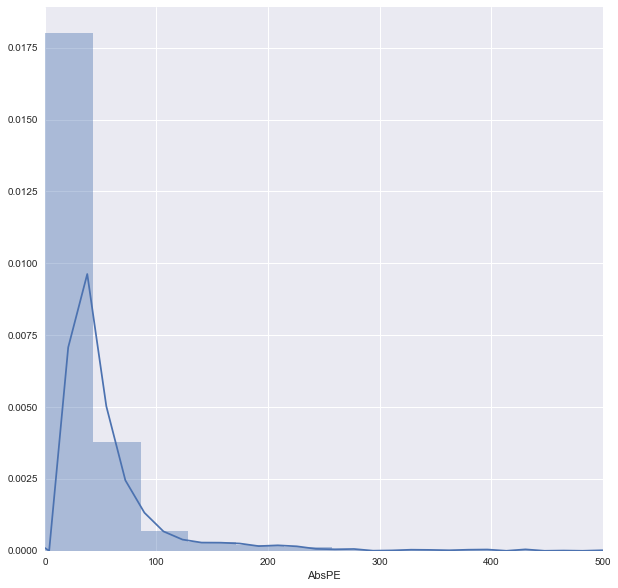

In [33]:
ax=sns.distplot(flatdata_adjusted['AbsPE'])
ax.figure.set_size_inches(10,10)
ax.set_xlim(-0.2,500)

# Project Level Inaccuracy
Group by Internal Project ID and take summation of the Weighted Percent Error column and then take the Absolute Value. Taking the absolute value later because that way we can assess the actual accuracy of forecast for each project, since positive and negative values will interact.

Creating another column to see how taking the Absolute Weighted Percent Error will affect.

#### Since we have already weighted the percent error, taking the summation will give the average error for a particular project.

In [70]:
averagecount=flatdata_adjusted['Count'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='AverageCount')
averageforecast=flatdata_adjusted['AdjustedForecast'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='AverageForecast')
improvement_type=flatdata_adjusted['ImprovementType'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='ImprovementType')
forecast_method=flatdata_adjusted['ForecastMethodology'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='Forecast_Method')
func_class=flatdata_adjusted['FunctionalClass'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='Func_Class')

#project_error=pd.merge(averagecount,averageforecast,left_on='InternalProjectID')
#project_error
func_class

,Func_Class
InternalProjectID,
10914,1.000000
12343,1.000000
12356,1.000000
13364,5.000000
13486,1.000000
13624,6.000000
16144,3.000000
16514,1.000000
16579,5.000000


In [39]:
pd.merge?

In [46]:
project_error=pd.merge(averagecount,averageforecast,left_index=True,right_index=True)
project_error

,AverageCount,AverageForecast
InternalProjectID,,
10914,67797.500000,69861.250000
12343,99720.000000,99724.000000
12356,28800.000000,31001.000000
13364,4610.000000,4910.000000
13486,53705.000000,60317.500000
13624,580.000000,635.000000
16144,15556.000000,16568.736842
16514,54630.000000,58143.333333
16579,2190.000000,2193.500000


In [47]:
project_error=project_error.assign(Error=project_error['AverageCount']-project_error['AverageForecast'])


In [48]:
project_error

,AverageCount,AverageForecast,Error
InternalProjectID,,,
10914,67797.500000,69861.250000,-2063.750000
12343,99720.000000,99724.000000,-4.000000
12356,28800.000000,31001.000000,-2201.000000
13364,4610.000000,4910.000000,-300.000000
13486,53705.000000,60317.500000,-6612.500000
13624,580.000000,635.000000,-55.000000
16144,15556.000000,16568.736842,-1012.736842
16514,54630.000000,58143.333333,-3513.333333
16579,2190.000000,2193.500000,-3.500000


In [49]:
project_error=project_error.assign(PercentError=100*project_error['Error']/project_error['AverageForecast'])

In [50]:
project_error

,AverageCount,AverageForecast,Error,PercentError
InternalProjectID,,,,
10914,67797.500000,69861.250000,-2063.750000,-2.954070
12343,99720.000000,99724.000000,-4.000000,-0.004011
12356,28800.000000,31001.000000,-2201.000000,-7.099771
13364,4610.000000,4910.000000,-300.000000,-6.109980
13486,53705.000000,60317.500000,-6612.500000,-10.962822
13624,580.000000,635.000000,-55.000000,-8.661417
16144,15556.000000,16568.736842,-1012.736842,-6.112336
16514,54630.000000,58143.333333,-3513.333333,-6.042539
16579,2190.000000,2193.500000,-3.500000,-0.159562


In [51]:
project_error=project_error.assign(AbsPE=np.abs(project_error['PercentError']))
project_error

,AverageCount,AverageForecast,Error,PercentError,AbsPE
InternalProjectID,,,,,
10914,67797.500000,69861.250000,-2063.750000,-2.954070,2.954070
12343,99720.000000,99724.000000,-4.000000,-0.004011,0.004011
12356,28800.000000,31001.000000,-2201.000000,-7.099771,7.099771
13364,4610.000000,4910.000000,-300.000000,-6.109980,6.109980
13486,53705.000000,60317.500000,-6612.500000,-10.962822,10.962822
13624,580.000000,635.000000,-55.000000,-8.661417,8.661417
16144,15556.000000,16568.736842,-1012.736842,-6.112336,6.112336
16514,54630.000000,58143.333333,-3513.333333,-6.042539,6.042539
16579,2190.000000,2193.500000,-3.500000,-0.159562,0.159562


In [71]:
project_error=pd.merge(project_error,improvement_type,left_index=True,right_index=True)


In [73]:
project_error=pd.merge(project_error,func_class,left_index=True,right_index=True)

In [75]:
project_error=pd.merge(project_error,forecast_method,left_index=True,right_index=True)

In [76]:
project_error

,AverageCount,AverageForecast,Error,PercentError,AbsPE,ImprovementType,Func_Class,Forecast_Method
InternalProjectID,,,,,,,,
10914,67797.500000,69861.250000,-2063.750000,-2.954070,2.954070,11.000000,1.000000,6.0
12343,99720.000000,99724.000000,-4.000000,-0.004011,0.004011,1.000000,1.000000,6.0
12356,28800.000000,31001.000000,-2201.000000,-7.099771,7.099771,12.000000,1.000000,6.0
13364,4610.000000,4910.000000,-300.000000,-6.109980,6.109980,1.000000,5.000000,6.0
13486,53705.000000,60317.500000,-6612.500000,-10.962822,10.962822,3.000000,1.000000,6.0
13624,580.000000,635.000000,-55.000000,-8.661417,8.661417,1.000000,6.000000,6.0
16144,15556.000000,16568.736842,-1012.736842,-6.112336,6.112336,2.000000,3.000000,6.0
16514,54630.000000,58143.333333,-3513.333333,-6.042539,6.042539,11.000000,1.000000,6.0
16579,2190.000000,2193.500000,-3.500000,-0.159562,0.159562,1.000000,5.000000,6.0


### Project level Analysis Results

In [77]:
project_error.describe()

,AverageCount,AverageForecast,Error,PercentError,AbsPE,ImprovementType,Func_Class,Forecast_Method
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,21950.401712,23726.990621,-1776.588909,-4.750296,20.177556,4.878142,3.627973,4.447258
std,24808.688201,26571.256072,8745.042432,47.860986,43.654573,5.034390,1.909945,2.061630
min,130.000000,170.000000,-75773.666667,-86.645461,0.000000,1.000000,0.384615,1.000000
25%,5937.666667,6483.000000,-3145.000000,-19.461427,5.771410,1.000000,3.000000,4.000000
50%,13300.000000,14666.666667,-865.750000,-8.385158,12.903226,1.000000,3.000000,6.000000
75%,29000.000000,30527.500000,47.500000,0.636307,24.002089,12.000000,4.333333,6.000000
max,172000.000000,171196.666700,121287.500000,1096.781076,1096.781076,12.000000,8.000000,6.000000


In [54]:
#project_error2.describe() #the absolute weighted error was taken and then summed, which creates the average

(-100, 100)

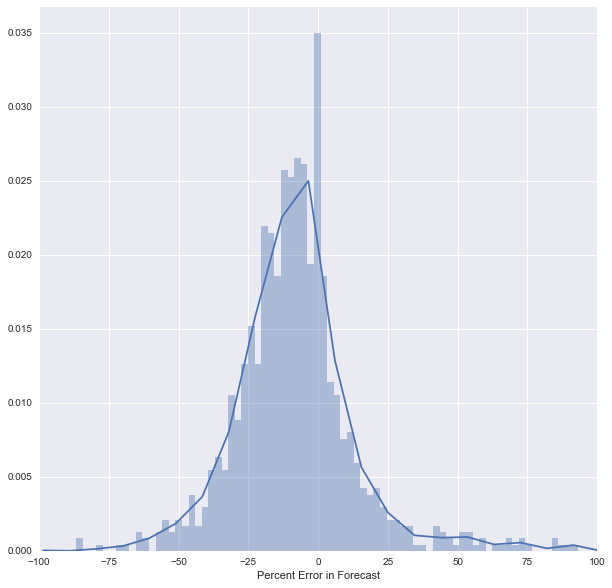

In [78]:
ax=sns.distplot(project_error['PercentError'],bins=500,kde=True,axlabel='Percent Error in Forecast')
ax.figure.set_size_inches(10,10)
ax.set_xlim(-100,100)

(-10, 100)

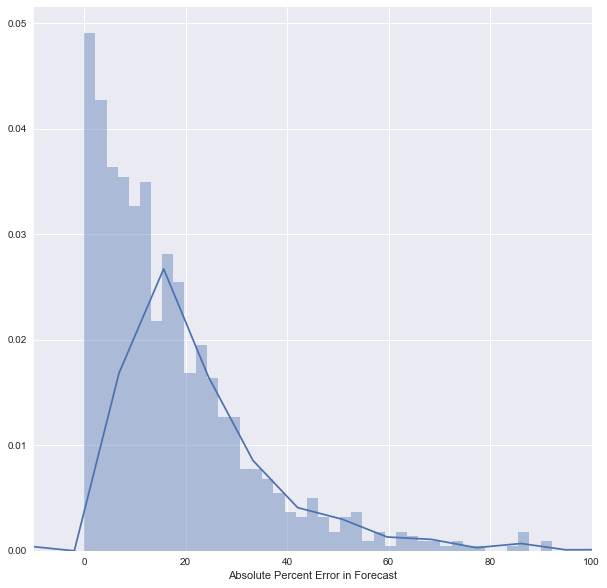

In [79]:
ax=sns.distplot(project_error['AbsPE'],bins=500,kde=True,axlabel='Absolute Percent Error in Forecast')
ax.figure.set_size_inches(10,10)
ax.set_xlim(-10,100)

In [85]:
error_imptype=project_error['AbsPE'].groupby(project_error['ImprovementType']).mean().to_frame(name='ByImprovementType')


In [86]:
error_imptype

,ByImprovementType
ImprovementType,
1.000000,17.696831
2.000000,18.186642
3.000000,22.093647
3.076923,4.776002
4.000000,24.472420
5.000000,2.584493
7.000000,2.391527
7.600000,29.069322
8.000000,10.421154
